In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '6'

In [2]:
#loading and importing data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.utils import class_weight
import scipy
from scipy import stats
from sklearn.preprocessing import StandardScaler
import os


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

2023-03-15 00:14:35.564449: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 00:14:35.718497: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-15 00:14:35.753033: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data_dir = '/scratch/zczqlzh/ddos_lab/dataset/03-11/'
df_path = '/scratch/zczqlzh/ddos_lab/dataset/03-11/df.csv'
df_clean_path = '/scratch/zczqlzh/ddos_lab/dataset/03-11/df_clean.csv'
print(os.listdir(data_dir))

['Syn.csv', 'Portmap.csv', 'NetBIOS.csv', 'df_clean.csv', 'df.csv', 'UDPLag.csv', 'LDAP.csv', 'MSSQL.csv', 'UDP.csv']


In [9]:

# df_SYN = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/Syn.csv')
# df_MSSQL = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/MSSQL.csv')
# df_UDPLag = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/UDPLag.csv')
# df_LDAP = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/LDAP.csv')
# df_UDP = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/UDP.csv')
# df_Portmap = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/Portmap.csv')
# df_NetBIOS = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/NetBIOS.csv')


/tmp/ipykernel_863629/1435790579.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SYN = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/Syn.csv')
/tmp/ipykernel_863629/1435790579.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_MSSQL = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/MSSQL.csv')
/tmp/ipykernel_863629/1435790579.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_UDPLag = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/UDPLag.csv')
/tmp/ipykernel_863629/1435790579.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df_LDAP = pd.read_csv('/scratch/zczqlzh/ddos_lab/dataset/03-11/LDAP.csv')
/tmp/ipykernel_863629/1435790579.py:5: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory

In [ ]:
# df = pd.concat([df_SYN, df_MSSQL, df_UDPLag, df_LDAP, df_UDP, df_Portmap, df_NetBIOS], axis=0)
# df.to_csv(df_path)

In [6]:
df = pd.read_csv(df_path)
print(df.head(10))
# df[' Label'].value_counts()

In [5]:
# df.info()

print(df.shape)

(20364525, 89)


In [6]:
print(df.dtypes)

Unnamed: 0.1      int64
Unnamed: 0        int64
Flow ID          object
 Source IP       object
 Source Port      int64
                 ...   
 Idle Max       float64
 Idle Min       float64
SimillarHTTP     object
 Inbound          int64
 Label           object
Length: 89, dtype: object


In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', 

In [8]:
print('Label distribution\n')
print(df[' Label'].value_counts())

Label distribution

MSSQL      5787453
Syn        4891500
UDP        3867155
NetBIOS    3657497
LDAP       1915122
Portmap     186960
BENIGN       56965
UDPLag        1873
Name:  Label, dtype: int64


In [9]:
##types of object remove flowid and timestamp
for col in df.columns:
    if df[col].dtypes == 'object' :
        unique = len(df[col].unique())
        print("Feature '{col}' has {unique} categories".format(col=col, unique=unique))

Feature 'Flow ID' has 17800442 categories
Feature ' Source IP' has 1232 categories
Feature ' Destination IP' has 1286 categories
Feature ' Timestamp' has 19879763 categories
Feature 'SimillarHTTP' has 234 categories
Feature ' Label' has 8 categories


In [15]:
##valid
for col in df.columns:
    if df[col].dtypes == 'object' :
        unique = len(df[col].unique())
        print("Feature '{col}' has {unique} categories".format(col=col, unique=unique))

Feature ' Label' has 8 categories


In [18]:
# print(df['SimillarHTTP'].value_counts().sort_values(ascending=False).head())
# print('\n')

In [10]:
##types of int:  Protocol
list=[]
for col in df.columns:
    if df[col].dtypes == 'int64' :
        unique = len(df[col].unique())
        if unique == 1:
            list.append(col)
        print("Feature '{col}' has {unique} categories".format(col=col, unique=unique))
print("The following features have the same value:")
print(list)

Feature 'Unnamed: 0.1' has 5775786 categories
Feature 'Unnamed: 0' has 670644 categories
Feature ' Source Port' has 61031 categories
Feature ' Destination Port' has 65535 categories
Feature ' Protocol' has 3 categories
Feature ' Flow Duration' has 617237 categories
Feature ' Total Fwd Packets' has 396 categories
Feature ' Total Backward Packets' has 399 categories
Feature 'Fwd PSH Flags' has 2 categories
Feature ' Bwd PSH Flags' has 1 categories
Feature ' Fwd URG Flags' has 1 categories
Feature ' Bwd URG Flags' has 1 categories
Feature ' Fwd Header Length' has 3492 categories
Feature ' Bwd Header Length' has 936 categories
Feature 'FIN Flag Count' has 1 categories
Feature ' SYN Flag Count' has 2 categories
Feature ' RST Flag Count' has 2 categories
Feature ' PSH Flag Count' has 1 categories
Feature ' ACK Flag Count' has 2 categories
Feature ' URG Flag Count' has 2 categories
Feature ' CWE Flag Count' has 2 categories
Feature ' ECE Flag Count' has 1 categories
Feature ' Fwd Header Lengt

In [17]:
## valid
##types of int:  Protocol
for col in df.columns:
    if df[col].dtypes == 'int64' :
        unique = len(df[col].unique())
        print("Feature '{col}' has {unique} categories".format(col=col, unique=unique))


Feature ' Source Port' has 61031 categories
Feature ' Destination Port' has 65535 categories
Feature ' Protocol' has 3 categories
Feature ' Flow Duration' has 617237 categories
Feature ' Total Fwd Packets' has 396 categories
Feature ' Total Backward Packets' has 399 categories
Feature 'Fwd PSH Flags' has 2 categories
Feature ' Fwd Header Length' has 3492 categories
Feature ' Bwd Header Length' has 936 categories
Feature ' SYN Flag Count' has 2 categories
Feature ' RST Flag Count' has 2 categories
Feature ' ACK Flag Count' has 2 categories
Feature ' URG Flag Count' has 2 categories
Feature ' CWE Flag Count' has 2 categories
Feature ' Fwd Header Length.1' has 3492 categories
Feature 'Subflow Fwd Packets' has 396 categories
Feature ' Subflow Fwd Bytes' has 4386 categories
Feature ' Subflow Bwd Packets' has 399 categories
Feature ' Subflow Bwd Bytes' has 4611 categories
Feature 'Init_Win_bytes_forward' has 1743 categories
Feature ' Init_Win_bytes_backward' has 1337 categories
Feature ' act

In [19]:
##types of float
for col in df.columns:
    if df[col].dtypes == 'float64' :
        unique = len(df[col].unique())
        print("Feature '{col}' has {unique} categories".format(col=col, unique=unique))

Feature 'Total Length of Fwd Packets' has 4386 categories
Feature ' Total Length of Bwd Packets' has 4611 categories
Feature ' Fwd Packet Length Max' has 1907 categories
Feature ' Fwd Packet Length Min' has 747 categories
Feature ' Fwd Packet Length Mean' has 7276 categories
Feature ' Fwd Packet Length Std' has 6901 categories
Feature 'Bwd Packet Length Max' has 1069 categories
Feature ' Bwd Packet Length Min' has 214 categories
Feature ' Bwd Packet Length Mean' has 6189 categories
Feature ' Bwd Packet Length Std' has 6266 categories
Feature 'Flow Bytes/s' has 728132 categories
Feature ' Flow Packets/s' has 635019 categories
Feature ' Flow IAT Mean' has 647573 categories
Feature ' Flow IAT Std' has 1391906 categories
Feature ' Flow IAT Max' has 567744 categories
Feature ' Flow IAT Min' has 2481 categories
Feature 'Fwd IAT Total' has 607967 categories
Feature ' Fwd IAT Mean' has 633907 categories
Feature ' Fwd IAT Std' has 1374726 categories
Feature ' Fwd IAT Max' has 556422 categories


### Clean df

In [11]:
df = df.drop(labels = ['Unnamed: 0'],axis = 1) 
df = df.drop(labels = ['Unnamed: 0.1'],axis = 1) 

In [12]:
df = df.drop(labels = ['Flow ID'],axis = 1) 
df = df.drop(labels = [' Timestamp'],axis = 1) 
df = df.drop(labels = [' Source IP'],axis = 1) 
df = df.drop(labels = [' Destination IP'],axis = 1) 
df = df.drop(labels = ['SimillarHTTP'],axis = 1) 



In [13]:
for i in list:
    df = df.drop(labels = [i],axis = 1) 
    print(f"successfully remove the feature {i} which have the same value")

successfully remove the feature  Bwd PSH Flags which have the same value
successfully remove the feature  Fwd URG Flags which have the same value
successfully remove the feature  Bwd URG Flags which have the same value
successfully remove the feature FIN Flag Count which have the same value
successfully remove the feature  PSH Flag Count which have the same value
successfully remove the feature  ECE Flag Count which have the same value
successfully remove the feature Fwd Avg Bytes/Bulk which have the same value
successfully remove the feature  Fwd Avg Packets/Bulk which have the same value
successfully remove the feature  Fwd Avg Bulk Rate which have the same value
successfully remove the feature  Bwd Avg Bytes/Bulk which have the same value
successfully remove the feature  Bwd Avg Packets/Bulk which have the same value
successfully remove the feature Bwd Avg Bulk Rate which have the same value


In [14]:
df.shape

(20364525, 70)

### drop null

In [20]:
df.isnull().any().describe()

count        70
unique        2
top       False
freq         69
dtype: object

In [21]:
(df.isnull().sum()==0).index

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
       ' SYN Flag Count', ' RST F

In [22]:
df_nan = df[df.isnull().T.any()]
df_nan

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
73370,38108,13523,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn
73371,29175,13566,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn
149312,47147,46647,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Syn
480168,443,51846,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,BENIGN
480220,54404,443,6,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17366179,889,68,17,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NetBIOS
17679247,1014,68,17,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NetBIOS
17793052,844,68,17,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NetBIOS
18395252,818,68,17,0,2,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NetBIOS


In [23]:
df_nan=df_nan.index.tolist()

In [24]:
#drop nan, implace means based on original df
df.drop(index=df_nan,inplace=True)

In [25]:
df[df.isnull().T.any()]

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label


In [26]:
df.shape

(20364397, 70)

In [27]:


df[' Label'].loc[df[' Label'] == 'BENIGN' ] =0
df[' Label'].loc[df[' Label'] == 'MSSQL' ] =1
df[' Label'].loc[df[' Label'] == 'Syn' ] =2
df[' Label'].loc[df[' Label'] == 'LDAP' ] =3
df[' Label'].loc[df[' Label'] == 'NetBIOS' ] = 4
df[' Label'].loc[df[' Label'] == 'UDP' ] =5
df[' Label'].loc[df[' Label'] == 'UDPLag' ] = 6
df[' Label'].loc[df[' Label'] == 'Portmap' ] = 7

/tmp/ipykernel_936261/933249601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Label'].loc[df[' Label'] == 'BENIGN' ] =0
/tmp/ipykernel_936261/933249601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Label'].loc[df[' Label'] == 'MSSQL' ] =1
/tmp/ipykernel_936261/933249601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[' Label'].loc[df[' Label'] == 'Syn' ] =2
/tmp/ipykernel_936261/933249601.py:4: SettingWithC

In [28]:
df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,9429,9429,6,36063894,7,2,42.0,12.0,6.0,6.0,...,18.0,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,1,2
1,60224,60224,6,44851366,8,4,48.0,24.0,6.0,6.0,...,1.0,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,1,2
2,11746,33827,6,1,2,0,12.0,0.0,6.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,2
3,33828,1431,6,0,2,0,12.0,0.0,6.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,2
4,5311,5311,6,35731470,8,2,48.0,12.0,6.0,6.0,...,24.5,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364520,865,13711,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364521,866,65260,17,48,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364522,867,48342,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364523,868,64931,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4


In [29]:
#avoid can not drop infinity below
df[' Label'] =df[' Label'].astype("int64")

### drop inf

In [30]:
df.dtypes

 Source Port            int64
 Destination Port       int64
 Protocol               int64
 Flow Duration          int64
 Total Fwd Packets      int64
                       ...   
 Idle Std             float64
 Idle Max             float64
 Idle Min             float64
 Inbound                int64
 Label                  int64
Length: 70, dtype: object

In [66]:
df_inf = df[np.isfinite(df).all(1)]

In [67]:
df_inf

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,9429,9429,6,36063894,7,2,42.0,12.0,6.0,6.0,...,18.0,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,1,2
1,60224,60224,6,44851366,8,4,48.0,24.0,6.0,6.0,...,1.0,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,1,2
2,11746,33827,6,1,2,0,12.0,0.0,6.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,2
4,5311,5311,6,35731470,8,2,48.0,12.0,6.0,6.0,...,24.5,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,1,2
5,33829,32787,6,101,2,2,12.0,12.0,6.0,6.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20364520,865,13711,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364521,866,65260,17,48,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364522,867,48342,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4
20364523,868,64931,17,1,2,0,458.0,0.0,229.0,229.0,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1,4


In [33]:
df_inf.shape

(19557011, 70)

In [34]:
df_inf.to_csv(df_clean_path)

In [32]:
df_inf=pd.read_csv(df_clean_path)

In [33]:
df_weights = df_inf[' Label']
df_weights

0           2
1           2
2           2
3           2
4           2
           ..
19557006    4
19557007    4
19557008    4
19557009    4
19557010    4
Name:  Label, Length: 19557011, dtype: int64

In [34]:
print(df_weights.value_counts())

1    5584471
2    4558833
5    3790298
4    3515894
3    1872139
7     177197
0      56306
6       1873
Name:  Label, dtype: int64


### one hot encoding

In [8]:
sns.__version__

'0.12.2'

In [18]:
df_Y[' Label'].value_counts()

1    5584471
2    4558833
5    3790298
4    3515894
3    1872139
7     177197
0      56306
6       1873
Name:  Label, dtype: int64

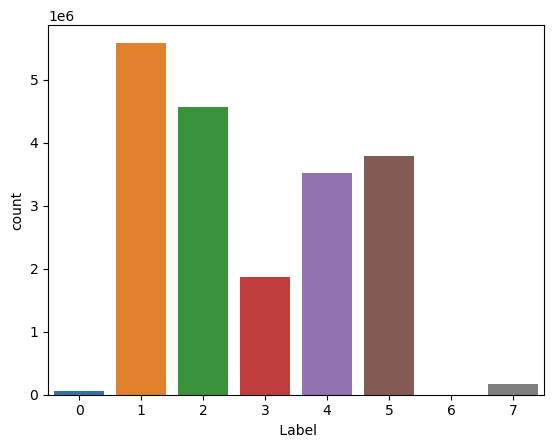

In [5]:
df_Y = df_inf[[' Label']].astype("int64")
g = sns.countplot(x=' Label', data=df_Y)

In [6]:
df_Y = to_categorical(df_Y, num_classes = 8)


In [8]:
print(df_Y)
print(df_Y.shape)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(19557011, 8)


In [7]:
# Drop 'label' column
df_inf = df_inf.drop(labels = [' Label'],axis = 1) 
df_inf = df_inf.drop(labels = ['Unnamed: 0'],axis = 1) 

In [9]:
df_inf.shape

(19557011, 69)

### Normalization

In [10]:
ss = StandardScaler()

In [11]:
df_std =ss.fit_transform(df_inf)


In [12]:
print(df_std)
print(df_std.shape)

[[ -0.86695627  -1.23829015  -1.80383525 ...   5.24361779   2.87424276
    0.05197847]
 [  1.3214529    1.44802369  -1.80383525 ...   8.23282355   5.89541742
    0.05197847]
 [ -0.76713258   0.05200781  -1.80383525 ...  -0.15921896  -0.14528414
  -19.23873559]
 ...
 [ -1.23583429   0.81963938   0.55418223 ...  -0.15921896  -0.14528414
    0.05197847]
 [ -1.23579121   1.69695526   0.55418223 ...  -0.15921896  -0.14528414
    0.05197847]
 [ -1.23574813   0.31230974   0.55418223 ...  -0.15921896  -0.14528414
    0.05197847]]
(19557011, 69)


## Dividing dataset

In [13]:
#divide trainset and test set
train_X,test_X,train_y,test_y = train_test_split(df_std,df_Y,test_size=0.1,random_state=5)

In [14]:
#divide train set and valid set
train_X,valid_x,train_y,valid_y = train_test_split(train_X,train_y,test_size=1/9,random_state=5)

In [18]:
# del df, df_Y

In [15]:
# train_X.shape
train_X

array([[-1.23997027, -0.92610764,  0.55418223, ..., -0.15921896,
        -0.14528414,  0.05197847],
       [ 1.39150612,  0.74628733,  0.55418223, ..., -0.15921896,
        -0.14528414,  0.05197847],
       [-0.48062956, -1.63651721, -1.80383525, ..., -0.15921896,
        -0.14528414,  0.05197847],
       ...,
       [ 1.39150612, -0.64872372,  0.55418223, ..., -0.15921896,
        -0.14528414,  0.05197847],
       [ 1.27643099,  1.26075649,  0.55418223, ..., -0.15921896,
        -0.14528414,  0.05197847],
       [-1.24160744, -0.0102383 ,  0.55418223, ..., -0.15921896,
        -0.14528414,  0.05197847]])

In [16]:
print(train_X.shape)
print(train_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_X.shape)
print(test_y.shape)

(15645608, 69)
(15645608, 8)
(1955701, 69)
(1955701, 8)
(1955702, 69)
(1955702, 8)


### Base Model 

In [17]:
model = Sequential()
model.add(Dense(units = 128, input_shape = (69,), activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 8, activation = "softmax"))



2023-03-15 00:17:46.438484: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 00:17:47.055821: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-03-15 00:17:47.055868: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 25557 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:8a:00.0, compute capability: 7.0


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8960      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 177,672
Trainable params: 177,672
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = Adam(lr=0.001)
metrics=[]
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/home/zczqlzh/p3-env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:

# Set a learning rate annealer

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [21]:
epochs = 50 
batch_size = 1024

In [22]:
history = model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, 
         validation_data = (valid_x, valid_y), verbose = 1,callbacks=[learning_rate_reduction])

Epoch 1/50
15279/15279 [==============================] - 68s 4ms/step - loss: 0.0640 - accuracy: 0.9834 - val_loss: 0.0552 - val_accuracy: 0.9854 - lr: 0.0010
Epoch 2/50
15279/15279 [==============================] - 67s 4ms/step - loss: 0.0556 - accuracy: 0.9853 - val_loss: 0.0535 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 3/50
15279/15279 [==============================] - 49s 3ms/step - loss: 0.0536 - accuracy: 0.9859 - val_loss: 0.0526 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 4/50
15279/15279 [==============================] - 63s 4ms/step - loss: 0.0532 - accuracy: 0.9859 - val_loss: 0.0526 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 5/50
15279/15279 [==============================] - 67s 4ms/step - loss: 0.0527 - accuracy: 0.9860 - val_loss: 0.0537 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/50
15279/15279 [==============================] - 56s 4ms/step - loss: 0.0526 - accuracy: 0.9860 - val_loss: 0.0519 - val_accuracy: 0.9860 - lr: 0.0010
Epoch 7/50
15279/15279 [================

15279/15279 [==============================] - 68s 4ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9866 - lr: 1.5625e-05
Epoch 45/50
15279/15279 [==============================] - 47s 3ms/step - loss: 0.0524 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9865 - lr: 1.0000e-05
Epoch 46/50
15279/15279 [==============================] - 67s 4ms/step - loss: 0.0549 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9865 - lr: 1.0000e-05
Epoch 47/50
15279/15279 [==============================] - 68s 4ms/step - loss: 0.0556 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9866 - lr: 1.0000e-05
Epoch 48/50
15279/15279 [==============================] - 53s 3ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9866 - lr: 1.0000e-05
Epoch 49/50
15279/15279 [==============================] - 62s 4ms/step - loss: 0.0489 - accuracy: 0.9867 - val_loss: 0.0495 - val_accuracy: 0.9865 - lr: 1.0000e-05
Epoch 50/50
15279/1527

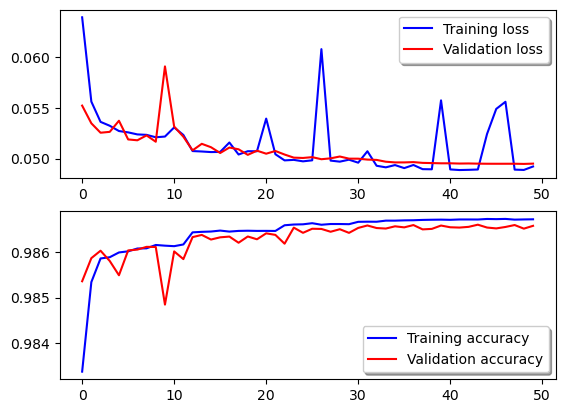

In [23]:
#evulation epoch 30
fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.savefig('./results_img/NN_base.jpg')


In [24]:
#Predict the output

Y_pred = model.predict(test_X,verbose=1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y,axis = 1) 
print(accuracy_score(Y_true, Y_pred_classes))



61116/61116 [==============================] - 78s 1ms/step
0.9868343950151914


In [25]:
model.save_weights('./model/NN_weights.h5')

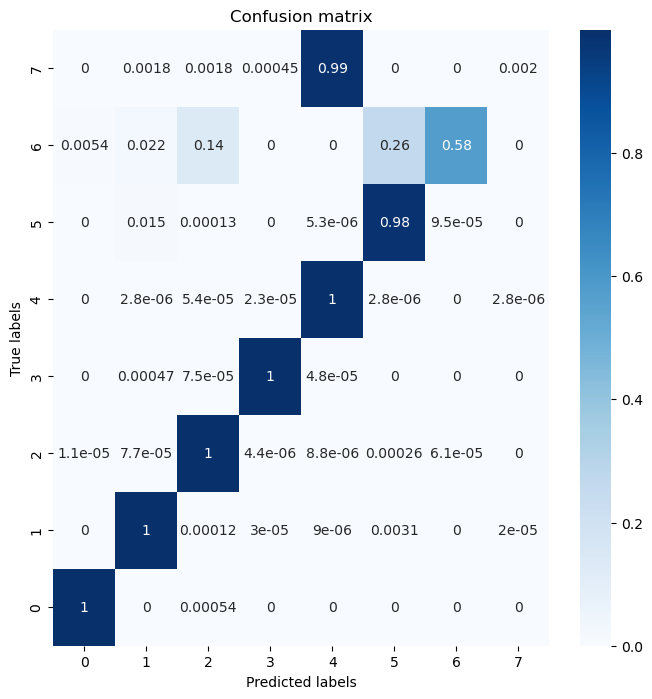

<Figure size 640x480 with 0 Axes>

In [26]:
disp = confusion_matrix(Y_true,Y_pred_classes,normalize='true')
plt.figure(figsize=(8, 8))
sns.heatmap(disp,annot=True,cmap='Blues')
plt.ylim(0, 8)
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
plt.savefig('./results_img/NN_base_matrix.jpg')


In [27]:
print(classification_report(Y_pred_classes,Y_true))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5609
           1       1.00      0.99      0.99    562327
           2       1.00      1.00      1.00    455923
           3       1.00      1.00      1.00    187309
           4       1.00      0.95      0.98    369668
           5       0.98      0.99      0.99    374648
           6       0.58      0.62      0.60       170
           7       0.00      0.75      0.00        48

    accuracy                           0.99   1955702
   macro avg       0.82      0.91      0.82   1955702
weighted avg       1.00      0.99      0.99   1955702



### Model (add weights)

In [28]:
model = Sequential()
model.add(Dense(units = 128, input_shape = (69,), activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 8, activation = "softmax"))



In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               8960      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 177,672
Trainable params: 177,672
Non-trainable params: 0
_________________________________________________________________


In [35]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(df_weights),
                                                 y = df_weights)
print(class_weights)
class_weights = dict(enumerate(class_weights))
class_weights




[4.34168006e+01 4.37754333e-01 5.36239510e-01 1.30579320e+00
 6.95307189e-01 6.44969439e-01 1.30519294e+03 1.37960935e+01]


{0: 43.4168006073953,
 1: 0.43775433250526324,
 2: 0.5362395101992111,
 3: 1.3057931996502397,
 4: 0.6953071892952404,
 5: 0.6449694390784049,
 6: 1305.1929391350775,
 7: 13.796093472237114}

In [38]:

# Set a learning rate annealer

learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [36]:
opt = Adam(lr=0.001)
metrics=[]
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/home/zczqlzh/p3-env/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [37]:
epochs = 50
batch_size = 1024

In [39]:
history = model.fit(train_X, train_y, batch_size = batch_size, epochs = epochs, 
         validation_data = (valid_x, valid_y), verbose = 1, callbacks=[learning_rate_reduction], class_weight=class_weights)

Epoch 1/50
15279/15279 [==============================] - 75s 5ms/step - loss: 0.4191 - accuracy: 0.8678 - val_loss: 0.1923 - val_accuracy: 0.8706 - lr: 0.0010
Epoch 2/50
15279/15279 [==============================] - 51s 3ms/step - loss: 0.4411 - accuracy: 0.8733 - val_loss: 0.1945 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 3/50
15279/15279 [==============================] - 72s 5ms/step - loss: 0.4883 - accuracy: 0.8732 - val_loss: 0.2306 - val_accuracy: 0.9488 - lr: 0.0010
Epoch 4/50
15279/15279 [==============================] - 71s 5ms/step - loss: 0.4868 - accuracy: 0.8676 - val_loss: 0.1803 - val_accuracy: 0.8599 - lr: 0.0010
Epoch 5/50
15279/15279 [==============================] - 51s 3ms/step - loss: 0.3766 - accuracy: 0.8629 - val_loss: 0.2803 - val_accuracy: 0.8289 - lr: 0.0010
Epoch 6/50
15279/15279 [==============================] - 71s 5ms/step - loss: 0.4250 - accuracy: 0.8658 - val_loss: 0.3569 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 7/50
15262/15279 [================

Epoch 44/50
15279/15279 [==============================] - 55s 4ms/step - loss: 0.2216 - accuracy: 0.8732 - val_loss: 0.1727 - val_accuracy: 0.8588 - lr: 1.0000e-05
Epoch 45/50
15279/15279 [==============================] - 72s 5ms/step - loss: 0.2153 - accuracy: 0.8737 - val_loss: 0.1688 - val_accuracy: 0.8599 - lr: 1.0000e-05
Epoch 46/50
15279/15279 [==============================] - 69s 4ms/step - loss: 0.2212 - accuracy: 0.8748 - val_loss: 0.1723 - val_accuracy: 0.8636 - lr: 1.0000e-05
Epoch 47/50
15279/15279 [==============================] - 56s 4ms/step - loss: 0.2160 - accuracy: 0.8776 - val_loss: 0.1732 - val_accuracy: 0.8631 - lr: 1.0000e-05
Epoch 48/50
15279/15279 [==============================] - 73s 5ms/step - loss: 0.2159 - accuracy: 0.8764 - val_loss: 0.1736 - val_accuracy: 0.8580 - lr: 1.0000e-05
Epoch 49/50
15279/15279 [==============================] - 68s 4ms/step - loss: 0.2246 - accuracy: 0.8799 - val_loss: 0.1713 - val_accuracy: 0.8609 - lr: 1.0000e-05
Epoch 50/5

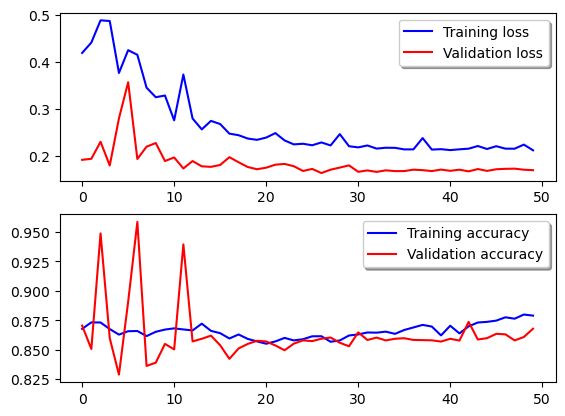

In [40]:

fig,ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.savefig('./results_img/NN_weighted.jpg')


In [44]:
model.save_weights('./model/NN_weighted.h5')

In [41]:
#Predict the output

Y_pred = model.predict(test_X,verbose=1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_y,axis = 1) 
print(accuracy_score(Y_true, Y_pred_classes))



61116/61116 [==============================] - 95s 2ms/step
0.868601146800484


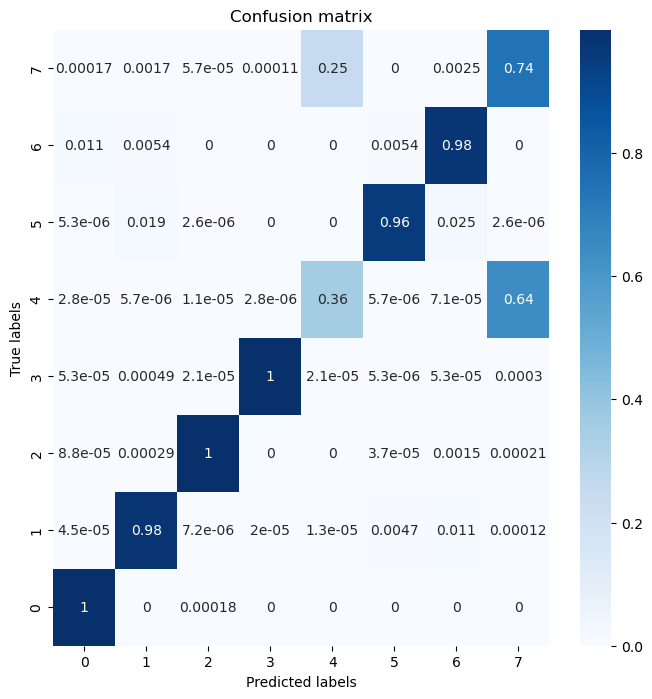

<Figure size 640x480 with 0 Axes>

In [42]:
disp = confusion_matrix(Y_true,Y_pred_classes,normalize='true')
plt.figure(figsize=(8, 8))
sns.heatmap(disp,annot=True,cmap='Blues')
plt.ylim(0, 8)
plt.title('Confusion matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
plt.savefig('./results_img/NN_weighted_matrix.jpg')


In [43]:
print(classification_report(Y_pred_classes,Y_true))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5697
           1       0.98      0.99      0.99    556950
           2       1.00      1.00      1.00    454966
           3       1.00      1.00      1.00    187222
           4       0.36      0.97      0.52    130858
           5       0.96      0.99      0.97    364528
           6       0.98      0.01      0.02     16446
           7       0.74      0.06      0.10    239035

    accuracy                           0.87   1955702
   macro avg       0.88      0.75      0.70   1955702
weighted avg       0.91      0.87      0.84   1955702

